In this notebook we play with different option to visualize the performance of the model. One key plot we used so far is the 95% 2D histogram. In that plot the colorbar is used to indicate the density of the points. 

A problem of such visualization is that it tends to be antintuitive as something that should be ignored (e.g. a larger uncertainty on pixels as rare as 1 in 10mln) appears as the most evident feature of the plot. Also, the color scale applied to the normalized pixel density is not something that a reader can quickly interpret in asbolute terms.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sdo.viz.plot_vt_outputs import plot_2Dhist_95cl
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_inventory =  '/home/Valentina/inventory_1904.pkl'
results_path = '/home/Valentina/results/'

In [3]:
# For details about how these predictions have been calculated refer to the the notebook 
# flares/experiments/02_train_on_flares.ipynb
pred20_on20 = results_path + '0600_test20_on20_test_predictions.npy'

Y = np.load(pred20_on20)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]

### 1D histogram

In [4]:
Y_test.shape

(667, 1, 512, 512)

In [19]:
(Y_test.flatten() >= 0).sum(), (Y_pred.flatten() >= 0).sum()

(174850048, 174850048)

In [8]:
len(Y_test.flatten()), len(Y_pred.flatten())

(174850048, 174850048)

No negative pixels (but we have some 0 pixels that will create issues with the log)

In [9]:
# this will take a minute or two
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()
idx = np.argsort(Y_test)
Y_test = Y_test[idx]
Y_pred = Y_pred[idx]

In [20]:
mask1 = Y_test > 0
Y_test = Y_test[mask1]
Y_pred = Y_pred[mask1]

In [22]:
Y_test[0], Y_pred[0]

(2.2955583e-05, 0.0038874464)

In [23]:
max(Y_test), max(Y_pred)

(25.480843, 66.11577)

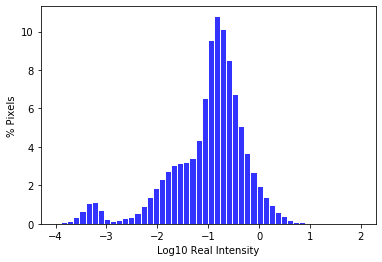

In [24]:
bins = 50
xrange = [-4,2]
width = 0.1
y, binEdges = np.histogram(np.log10(Y_test), bins=bins, range=xrange)
ynorm = y/len(Y_test)*100
bincenters = 0.5*(binEdges[1:] + binEdges[:-1])
plt.bar(bincenters, ynorm, width=width, color='b', alpha=0.8)
plt.xlabel('Log10 Real Intensity')
plt.ylabel('% Pixels')
plt.show()

In [25]:
binEdges[1]

-3.88

In [26]:
# this will take a few minutes
i = 0
l_bins= []
l_bincenters = []
for val in Y_test:
    if np.log10(val) <= binEdges[i+1]:
        l_bins.append(i)
    else:
        i=i+1
        l_bins.append(i)
    l_bincenters.append(bincenters[i])

In [27]:
df = pd.DataFrame({'Bins':l_bins, 'BinCenters':l_bincenters, 'YTest':Y_test,'YPred':Y_pred})
df['YTest-YPred'] = df.YTest - df.YPred
df['log10_YTest-log10_YPred'] = np.log10(df.YTest) - np.log10(df.YPred)
df.dropna(inplace=True)
df['(YTest-YPred)/YTest'] = (df.YTest - df.YPred)/df.YTest*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


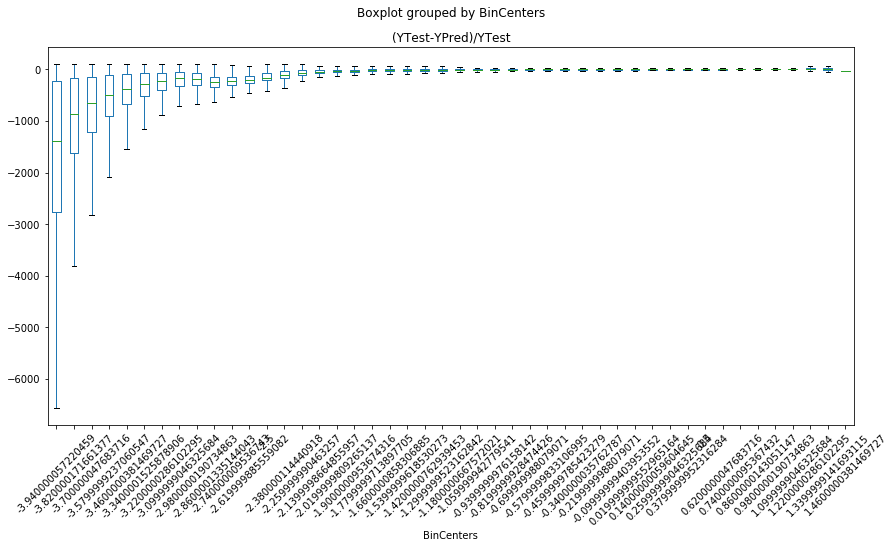

In [28]:
df.boxplot('(YTest-YPred)/YTest', by='BinCenters', showfliers=False, grid=False, rot=45, figsize=(14, 7))

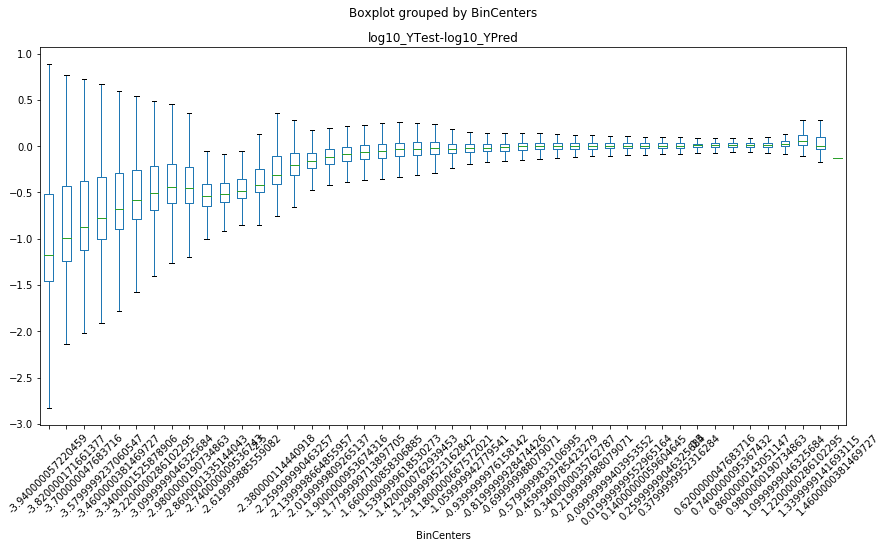

In [29]:
df.boxplot('log10_YTest-log10_YPred', by='BinCenters', showfliers=False, grid=False, rot=45, figsize=(14, 7))

Text(0, 0.5, '% Pixels')

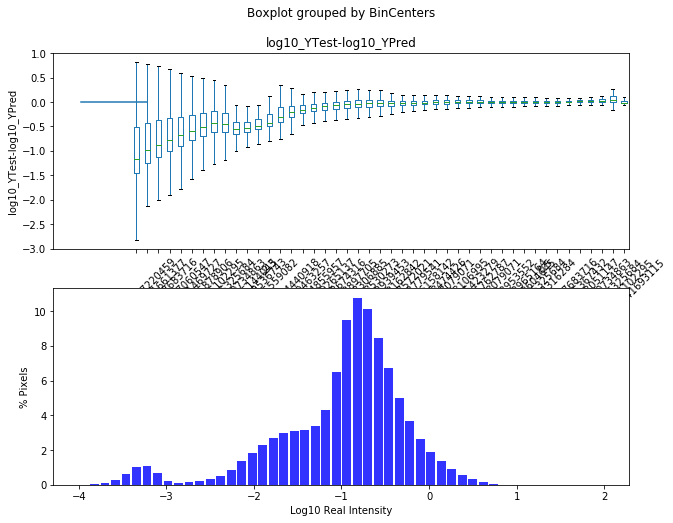

In [62]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,8))
fig.suptitle('Error on Predictions by True Intensity')
df.sample(frac=0.2).boxplot('log10_YTest-log10_YPred', by='BinCenters', showfliers=False, grid=False, rot=45, ax=ax1)
ax1.plot([-4,2], [0,0])
ax1.set_ylabel('log10_YTest-log10_YPred')
ax2.bar(bincenters, ynorm, width=width, color='b', alpha=0.8)
ax2.set_xlabel('Log10 Real Intensity')
ax2.set_ylabel('% Pixels')

Non si allinea, non so perche' .... prova a costruire dataframe unico a mano ....